Naoki Atkins

HW3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

**Question 1**

In [2]:
data = np.load('./boston.npz')

**Question 2**

In [3]:
validation_f = data['features'][:102]
validation_t = data['target'][:102]
training_f = data['features'][102:]
training_t = data['target'][102:]

**Question 3**

In [4]:
rm = training_f[:,5][:,None]
medv = training_t[:,None]

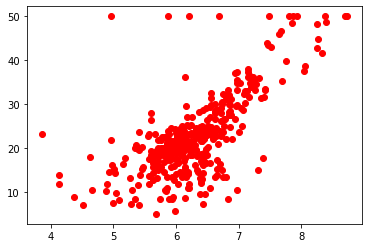

In [5]:
plt.plot(rm, medv, 'ro')

The number of rooms does seems to affect the median value in a linear fashion

**Question 4**

In [6]:
x = rm # rm = training_f[:,5][:,None]
t = medv # medv = training_t[:,None]

In [7]:
X = np.hstack((np.ones_like(x),x))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[[-34.12731481]
 [  9.03591206]]


The equation for MEDV as a linear function of RM is:
$$ MEDV = -34.13 + 9.04 * RM $$

**Question 5**

In [8]:
w.shape

(2, 1)

In [9]:
testx = np.linspace(4,9,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

In [10]:
testX.shape

(100, 2)

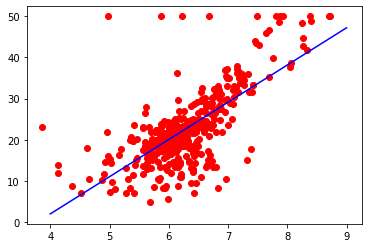

In [12]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

In [13]:
testx.shape

(100, 1)

In [14]:
testt.shape

(100, 1)

The model seems to fit pretty well.

**Question 6**

In [15]:
pred = w[0][0] + w[1][0]*x

In [16]:
avg_loss_training = 0

for idx, item in enumerate(pred):
    avg_loss_training += (item - training_t[idx])**2
    
avg_loss_training /= len(pred)

In [17]:
avg_loss_training

array([41.05654883])

**Question 7**

In [18]:
x = validation_f[:,5][:,None]

In [19]:
pred_validation = w[0][0] + w[1][0]*x

In [20]:
avg_loss_validation = 0

for idx, item in enumerate(pred_validation):
    avg_loss_validation += (item - validation_t[idx])**2
    
avg_loss_validation /= len(pred_validation) 

In [21]:
avg_loss_validation

array([53.76787796])

The training MSE is considerably lower as compared to the validation MSE which means that the model is overfitting the data

**Question 8**

Using all 13 input features means that our **w** vector will have 14 elements. 

Experiment 4: compute w for the training set

In [22]:
X = training_f #[:,None]
t = training_t[:,None]

In [23]:
X = np.concatenate((np.ones((len(X),1)),X),axis=1)
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

In [24]:
print(w)

[[ 31.96424094]
 [ -0.11455286]
 [  0.04489321]
 [  0.02837557]
 [  2.70909742]
 [-16.74036715]
 [  4.11148209]
 [ -0.00084791]
 [ -1.38493905]
 [  0.32108457]
 [ -0.01224971]
 [ -0.9125235 ]
 [  0.01025336]
 [ -0.47841463]]


Experiment 6: Find the predicted response for each training example using all the features. Then find the average loss

The form of the predicted equation is:
$$ t_{hat} = Xw$$

In [25]:
t_hat = np.dot(X,w)

In [26]:
training_avg_loss = 0

for idx, item in enumerate(t_hat):
    training_avg_loss += (item - training_t[idx])**2
    
training_avg_loss /= len(t_hat) 

training_avg_loss

array([21.80719958])

Experiment 7: Repeat experiment 6 for the validation set. Compare the training MSE and the validation MSE

In [27]:
X = validation_f
t = validation_t[:,None]

In [28]:
X = np.concatenate((np.ones((len(X),1)),X),axis=1)
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

In [29]:
print(w)

[[ 51.28112865]
 [ -0.09498482]
 [  0.04763051]
 [ -0.0363407 ]
 [  3.42317937]
 [-19.64878878]
 [  2.81393877]
 [  0.00715969]
 [ -1.83114511]
 [  0.25018375]
 [ -0.01212287]
 [ -1.15160786]
 [  0.00773584]
 [ -0.66295984]]


In [30]:
t_hat = np.dot(X,w)

In [31]:
validation_avg_loss = 0

for idx, item in enumerate(t_hat):
    validation_avg_loss += (item - validation_t[idx])**2
    
validation_avg_loss /= len(t_hat) 

validation_avg_loss

array([20.21414888])

The validation MSE is slightly lower than the training MSE. This means that the model fits the data well. The reason that the model fits well is because the model is taking into account all of the data that is available. This gives a better predictor for the Median Value. 

**Question 9**

    CRIM          -$114.55
    ZN             $44.89
    INDUS          $28.38
    CHAS           $2,709.10
    NOX           -$16,740.37
    RM             $4,111.48
    AGE            -$0.85
    DIS           -$1,384.94
    RAD            $321.08
    TAX           -$12.25
    PTRATIO       -$912.52
    B              $10.25
    LSTAT         -$478.41
              
              
              

**Question 10**

Based on these values, the top 3 features that make the biggest change in order are: NOX, RM, and CHAS